In [4]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
from IPython import display

In [6]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)
Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)
Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)
Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)
0
1
2
3
4
5
6
7
8
9
10
11


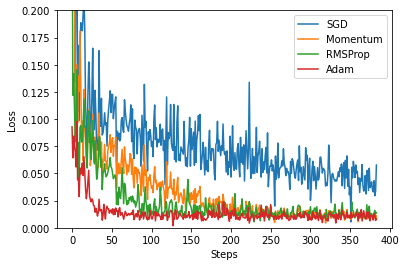

In [18]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1 * torch.normal(torch.zeros(x.size()))

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

class Net(torch.nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(in_features, hidden_features)
        self.predict = torch.nn.Linear(hidden_features, out_features)
        print(self)
    
    # X是网络的输入信息
    def forward(self, X):
        X = torch.relu(self.hidden(X))
        X = self.predict(X)
        return X

# different nets
net_SGD = Net(1, 20, 1)
net_Momentum = Net(1, 20, 1)
net_RMSprop = Net(1, 20, 1)
net_Adam = Net(1, 20, 1)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

# optimizers
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSProp = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimzers = [opt_SGD, opt_Momentum, opt_RMSProp, opt_Adam]

# loss
loss_func = torch.nn.MSELoss()
loss_history = [[], [], [], []]

for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimzers, loss_history):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step() # apply gradients
            l_his.append(loss.item())

labels = ['SGD', 'Momentum', 'RMSProp', 'Adam']
for i, loss_history in enumerate(loss_history):
    plt.plot(loss_history, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()